In [11]:
import math
import sympy as sym
from IPython.display import display

from sympy import linear_eq_to_matrix, linsolve

from sympy import symbols
from sympy.plotting import plot

from sympy import *

In [12]:
def simulation(a1,a2,x0,d):
    # Define os símbolos a, b e t
    a,b,t = sym.Symbol('a'), sym.Symbol('b'), sym.Symbol('t')

    # Define a forma da solução geral para os valores dados de a1 e a2 (reais e diferentes; imaginários)
    sol = (a*sym.exp(a1*t)) + (b*sym.exp(a2*t))
    print("Solução geral para raízes a1={} a2={}:".format(a1,a2)); display(sol)

    # Dadas as condições iniciais, é necessário calcular as váriáveis 'a' e 'b' a partir delas.
    # Calculando x(t) para t=0:
    sol_t0 = sol.subs(t, 0)
    print("x(0): "); display(sol_t0)

    # A segunda condição inicial é dada a partir da derivada de x(t) em relação a t:
    sol_prime = sym.diff( sol, t )
    print("dx(t)/dt: "); display(sol_prime)

    # Calculando a derivada da função para t=0
    sol_prime_t0 = sol_prime.subs(t, 0)
    print("dx(0)/dt: "); display(sol_prime_t0)

    # Iguala as equações às condições iniciais dadas (x(0)=5 e dx(0)/dt=2):
    eq1 = sol_t0 - x0
    eq2 = sol_prime_t0 - d

    # Resolve o sistema de 2 equações para 'a' e 'b':
    Matrixes = linear_eq_to_matrix([eq1,eq2], [a,b])
    final_solution = linsolve(Matrixes, [a,b])

    print("Solução Final:"); display(final_solution)

    return sol, final_solution

def result_plotting(eq, coefficients):
    # Substituindo 'a' e 'b' calculados pelas c.i.'s na equação da solução geral:
    a,b = sym.Symbol('a'), sym.Symbol('b')
    a_ = coefficients.args[0][0]
    b_ = coefficients.args[0][1]

    eq = eq.subs(a, a_).subs(b, b_)

    print("\t\t\tSolução: "); display(eq)

    # Plota o gráfico de x(t) x t
    p1 = plot(eq, show=False)
    p1.show()

In [13]:
# 1. α1 = 2 e α2 = 3, com condições iniciais x0 = 5 e dx0/dt = 2
eq, coefficients = simulation(a1=2, a2=3, x0=5, d=2)

Solução geral para raízes a1=2 a2=3:


a*exp(2*t) + b*exp(3*t)

x(0): 


a + b

dx(t)/dt: 


2*a*exp(2*t) + 3*b*exp(3*t)

dx(0)/dt: 


2*a + 3*b

Solução Final:


FiniteSet((13, -8))

			Solução: 


-8*exp(3*t) + 13*exp(2*t)

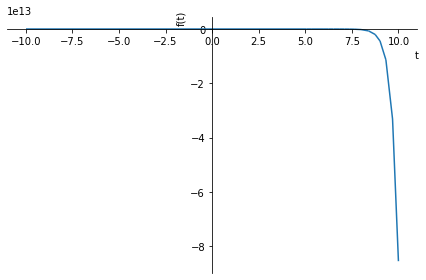

In [14]:
#2.
result_plotting(eq, coefficients)

In [15]:
# 2. 𝛼1 = −2 e 𝛼2 = −3, com condições iniciais 𝑥0 = 5 e 𝑑𝑥0𝑑𝑡= 2
eq, coefficients = simulation(a1=-2, a2=-3, x0=5, d=2)

Solução geral para raízes a1=-2 a2=-3:


a*exp(-2*t) + b*exp(-3*t)

x(0): 


a + b

dx(t)/dt: 


-2*a*exp(-2*t) - 3*b*exp(-3*t)

dx(0)/dt: 


-2*a - 3*b

Solução Final:


FiniteSet((17, -12))

			Solução: 


17*exp(-2*t) - 12*exp(-3*t)

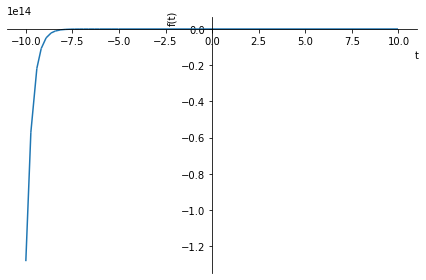

In [16]:
#3.
result_plotting(eq, coefficients)


In [17]:
#4) Sistema instável: 𝛼1 = 2 + 𝑗7 e 𝛼2 = 2 − 𝑗7, com condições iniciais 𝑥0 = 5 e 𝑑𝑥0/𝑑𝑡 = 2

# Definindo valores complexos
x1, x2, y1, y2 = symbols("x1 x2 y1 y2", real=True)
x = x1 + I*x2
y = y1 + I*y2
x = x.subs(x1,2).subs(x2,7)
y = y.subs(y1,2).subs(y2,-7)

eq, coefficients = simulation(a1=x, a2=y, x0=5, d=2)

Solução geral para raízes a1=2 + 7*I a2=2 - 7*I:


a*exp(t*(2 + 7*I)) + b*exp(t*(2 - 7*I))

x(0): 


a + b

dx(t)/dt: 


a*(2 + 7*I)*exp(t*(2 + 7*I)) + b*(2 - 7*I)*exp(t*(2 - 7*I))

dx(0)/dt: 


a*(2 + 7*I) + b*(2 - 7*I)

Solução Final:


FiniteSet((5/2 + 4*I/7, 5/2 - 4*I/7))

			Solução: 


(5/2 - 4*I/7)*exp(t*(2 - 7*I)) + (5/2 + 4*I/7)*exp(t*(2 + 7*I))

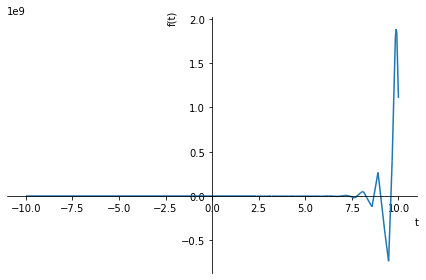

In [18]:
#4.
result_plotting(eq, coefficients)

In [19]:
#5) Sistema estável: 𝛼1 = −2 + 𝑗7 e 𝛼2 = −2 − 𝑗7, com condições iniciais 𝑥0 = 5 e 𝑑𝑥0/𝑑𝑡 = 2

# Definindo valores complexos
x1, x2, y1, y2 = symbols("x1 x2 y1 y2", real=True)  
x = x1 + I*x2
y = y1 + I*y2
x = x.subs(x1,-2).subs(x2,7)
y = y.subs(y1,-2).subs(y2,-7)

eq, coefficients = simulation(a1=x, a2=y, x0=5, d=2)

Solução geral para raízes a1=-2 + 7*I a2=-2 - 7*I:


a*exp(t*(-2 + 7*I)) + b*exp(t*(-2 - 7*I))

x(0): 


a + b

dx(t)/dt: 


a*(-2 + 7*I)*exp(t*(-2 + 7*I)) + b*(-2 - 7*I)*exp(t*(-2 - 7*I))

dx(0)/dt: 


a*(-2 + 7*I) + b*(-2 - 7*I)

Solução Final:


FiniteSet((5/2 - 6*I/7, 5/2 + 6*I/7))

			Solução: 


(5/2 + 6*I/7)*exp(t*(-2 - 7*I)) + (5/2 - 6*I/7)*exp(t*(-2 + 7*I))

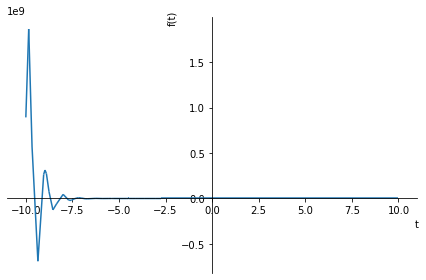

In [20]:
#5.
result_plotting(eq, coefficients)